In [1]:
import numpy as np
from numpy import genfromtxt
from numpy import linalg
import operator
import math
import matplotlib.pyplot as plt

In [15]:
k_tr = genfromtxt('knn-train.txt')
k_test=genfromtxt('knn-test.txt')
print(len(k_test))
gx=[]
gy=[]
bx=[]
by=[]

200


In [23]:
def knn_acc(k_test, k_train, k):
  accu=0
  pred=[]
  ind=0
  
  for i in k_test:
    dist=[]
    g=0
    b=0
    c=0
    for j in k_train:
      #t1=n
      dist.append([np.linalg.norm(i[:2]-j[:2]), c])
      c+=1
    dist.sort(key = operator.itemgetter(0))
    c1=0
    c2=0
    pr=0
    for j in range(k):
      if k_train[dist[j][1]][2]==1:
        c1+=1
      else:
        c2+=1
    if c1>c2:
      pr=1
      gx.append(i[0])
      gy.append(i[1])
    else:
      pr=-1
      bx.append(i[0])
      by.append(i[1])
    if i[2]==pr:
      accu+=1 
  return accu

[88.0, 89.5, 89.0, 91.5, 90.0, 91.5, 91.5, 91.5, 91.5, 93.0, 92.0, 93.0, 91.0, 91.5, 90.0, 90.0, 89.0, 89.0, 89.0]


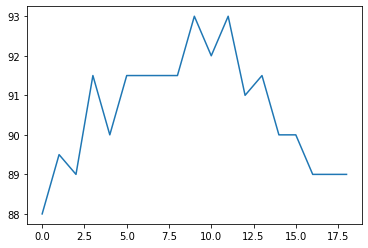

In [17]:
accuracy=[]
for  i in range(1,20):                                   # Assumed K value
  a=knn_acc(k_test, k_tr, i)
  a=(a/200)*100
  accuracy.append(a) 
  i+=2
print(accuracy)
plt.plot(accuracy)

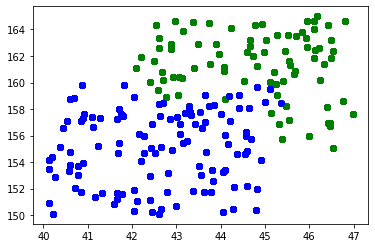

In [26]:
plt.scatter(gx,gy,color='green')
plt.scatter(bx,by,color='blue') 

Question 2:

In [ ]:
p_train = genfromtxt('perceptron-train.txt')
p_test = genfromtxt('perceptron-test.txt')

In [ ]:
def prcpt_acc(p_train,q):
  if(q==1):
    w=np.random.uniform(low=-5,high=5,size=(1,2))
    tr = p_train[:,:2]
  if(q==2):
    w=np.random.uniform(low=-5,high=5,size=(1,3))
    tr=p_train
  itr=0
  acc=0
  x=0
  while(1):
    itr+=1
    f=0
    c=0
    #print(x)
    x+=1
    #print(w)
    for c in range(len(p_train)):
      yi=p_train[c][2]
      dt=np.dot(w,tr[c])
      dt1=yi*dt
      if dt1<0:
        w+=(yi*tr[c])
        f+=1
        break
    if f==0:
      break
  print("iterations are: ",itr)
  return w

In [ ]:
def pred(p_test):
  acc=0
  tst = p_test[:,:2]
  yi = p_test[:,-1]
  c=0
  for c in range(len(tst)):
    p=0
    dt=np.dot(w,tst[c])
    if dt>=0:
      p=1
      gx.append(tst[c][0])
      gy.append(tst[c][1])
    else:
      p=-1
      bx.append(tst[c][0])
      by.append(tst[c][1])
    if(p==yi[c]):
      acc+=1
  acc=(acc/200)*100
  print(acc)

In [ ]:
w=prcpt_acc(p_train,1)

iterations are:  10996


100.0


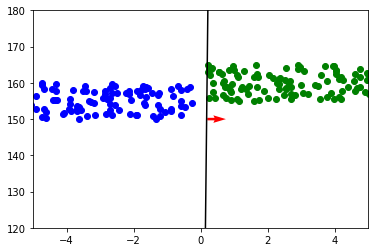

In [ ]:
acc=0
gx=[]
gy=[]
bx=[]
by=[]
pred(p_test)

x = np.linspace(-2,2,100)
slope = (-1*w[0][0]/w[0][1])
y = slope*(x) 
plt.plot(x, y, color = 'black')
plt.quiver(0.2, 150, w[0][0],w[0][1], color ='red')

plt.scatter(gx,gy,color='green')
plt.scatter(bx,by,color='blue')


plt.xlim(-5,5)
plt.ylim(120,180)
plt.show()

In [ ]:
dist=[]
gam=[]
for i in p_test:
  x=(i[0]*i[0])+(i[1]*i[1])
  x=math.sqrt(x)
  dist.append(x)
dist.sort()
print("R is: ",dist[len(p_test)-1]+1)
z=np.linalg.norm(w)
a=w/z
for i in p_test:
  dt=(a[0][0]*i[0] + a[0][1]*i[1])
  dt*=i[2]
  gam.append(dt)
print(gam)
gam.sort()
print("gamma is: ",gam[0])

R is:  166.00377396208316
[2.076830373947235, 1.691273673635883, 3.8885149520970774, 2.754383233851361, 3.3732638145056786, 4.202389664697979, 0.071471235645515, 0.494073976082662, 5.09347749671579, 2.307855870309973, 1.8408664015699705, 4.04192154703062, 0.755170394717516, 2.8891514490331445, 2.5148457449328956, 3.5750056975319797, 1.5545360344095163, 1.6289650616607008, 5.249874617308084, 1.833766973894893, 0.773925243570696, 1.8609381565927552, 0.4568804578601472, 1.3870532820379684, 3.8435300882983063, 4.9576255550834425, 0.02843985175807645, 1.760046224992883, 4.103881642305704, 0.1785392736649932, 1.8222062271648911, 4.849738789734372, 4.431023324949385, 1.5053238961877706, 4.576185178006676, 4.914916389784818, 1.470474862795918, 2.884155012891188, 0.6875247945272074, 2.4887268910823312, 4.639805697666001, 2.6768124486555718, 3.0355738770267053, 2.171662928691462, 3.3892262252114658, 2.4221241697522298, 3.7643333546062823, 2.849565205045373, 3.9312284596810696, 2.5005099209562216

Question 3

In [ ]:
pbs_tr = genfromtxt('perceptron-biased-train.txt')
pbs_test = genfromtxt('perceptron-biased-test.txt')

In [ ]:
tst=np.zeros((len(pbs_test),3))
tr=np.zeros((len(pbs_tr),3))
for i in range(len(pbs_test)):
  tst[i][0]=pbs_test[i][0]
  tst[i][1]=pbs_test[i][1]
  tst[i][2]=1
for i in range(len(pbs_tr)):
  tr[i][0]=pbs_tr[i][0]
  tr[i][1]=pbs_tr[i][1]
  tr[i][2]=1
print(tr)

[[ 42.4957173  164.10344185   1.        ]
 [ 45.46175554 162.47225377   1.        ]
 [ 42.37684036 159.5919576    1.        ]
 ...
 [ 36.25531034 157.59238323   1.        ]
 [ 41.51346957 160.07487553   1.        ]
 [ 37.11500564 157.03550346   1.        ]]


In [ ]:
def prcpt_accd(p_train):
  w=np.random.uniform(low=-5,high=5,size=(1,3))
  itr=0
  acc=0
  x=0
  while(1):
    itr+=1
    f=0
    c=0
    #print(x)
    x+=1
    #print(w)
    for c in range(len(pbs_tr)):
      yi=pbs_tr[c][2]
      dt=np.dot(w,tr[c])
      dt1=yi*dt
      if dt1<0:
        w+=(yi*tr[c])
        f+=1
        break
    if f==0:
      break
  print("iterations are: ",itr)
  return w

In [ ]:
w=prcpt_accd(tr)

iterations are:  4655703


In [ ]:
print(w)

[[   6848.37414319    -559.37376281 -189175.9553    ]]


In [ ]:
def pred(p_test):
  acc=0
  yi = pbs_test[:,-1]
  c=0
  for c in range(len(tst)):
    p=0
    dt=np.dot(w,tst[c])
    if dt>=0:
      p=1
      gx.append(tst[c][0])
      gy.append(tst[c][1])
    else:
      p=-1
      bx.append(tst[c][0])
      by.append(tst[c][1])
    if(p==yi[c]):
      acc+=1
  acc=(acc/200)*100
  print(acc)

100.0


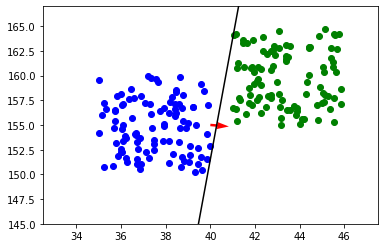

In [ ]:
acc=0
gx=[]
gy=[]
bx=[]
by=[]
pred(tst)
x = np.linspace(35,45,100)
slope = (-1*w[0][0]/w[0][1])
y = slope*(x) - (w[0][2]/w[0][1])
plt.plot(x, y, color = 'black')
plt.quiver(40, 155,50*w[0][0],50*w[0][1], color ='red')

plt.scatter(gx,gy,color='green')
plt.scatter(bx,by,color='blue')
plt.xlim(32.5,47.5)
plt.ylim(145,167)
plt.show()